# project 

# Airline Customer Segmentation
by Vinodhini Rajamanickam

## import necessary libraries

In [1]:
#data loading and manipulation
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling
from sklearn.preprocessing import StandardScaler

#algorithm
from sklearn.cluster import KMeans

## load data

In [2]:
#load data
data = pd.read_csv("flight_train.csv")

In [3]:
#view the data
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


##  Exploratory Data Analysis

In [4]:
#print all column name
data.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

we can see that some of the columns are not necessary for this  project, which will only increase the dimensionality. It is better to remove in the preprocessing phase

In [5]:
#Check for the shape of the data
data.shape

(55000, 23)

In [6]:
#check for basic details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [7]:
#check for statistical details
data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,55000.000000,55000.000000,54658.000000,55000.000000,55000.000000,54738.000000,54937.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.00000,55000.000000
mean,31549.707145,4.115727,42.705789,13.213527,12362.465164,6002.575145,6325.644993,19256.688255,155.593436,62.979631,172.201745,0.361727,0.736753,14102.26780,2.827073
std,18177.005101,0.395579,9.803796,14.528764,17012.468908,8458.072660,9080.805391,21613.796416,169.987954,64.506386,117.382011,1.201922,0.177283,21049.88039,7.526118
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1380.000000,1.000000,0.000000,0.000000,0.000000,0.136017,0.00000,0.000000
25%,15798.750000,4.000000,35.000000,4.000000,3497.000000,1400.000000,1300.000000,6332.000000,25.000000,25.166667,90.000000,0.000000,0.629210,3796.00000,0.000000
50%,31559.500000,4.000000,42.000000,8.000000,6903.000000,3426.500000,3484.000000,11983.000000,91.000000,44.600000,149.000000,0.000000,0.720056,7611.00000,0.000000
75%,47322.250000,4.000000,48.000000,16.000000,14481.000000,7406.000000,7760.000000,23761.500000,226.000000,77.500000,230.000000,0.000000,0.813888,16046.75000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,730.000000,714.000000,719.000000,46.000000,1.500000,795398.00000,140.000000


In [8]:
#check for duplicate values
data.duplicated().sum()

0

In [9]:
#check for null values
data.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

##  PreProcessing

### 1. fill null values

There is no method to fill null values in WORK_CITY column. we cannot fill it with most occuring value or any other method because it could give wrong information. so , sometimes it is better to remove them.

In [10]:
data["WORK_CITY"].notnull()

0         True
1        False
2         True
3         True
4         True
         ...  
54995     True
54996     True
54997     True
54998     True
54999     True
Name: WORK_CITY, Length: 55000, dtype: bool

In [11]:
#remove null values from the data of WORK_CITY and WORK_PROVINCE
data = data[data["WORK_CITY"].notnull()& data["WORK_PROVINCE"].notnull()]
data = data[data["WORK_COUNTRY"].notnull()]

In [12]:
#chck for null values after removing them
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                  268
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             249
SUM_YR_2              60
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [13]:
#filling null vaues in Aege column with mean value
data["AGE"] = data["AGE"].fillna(data["AGE"].mean())

#check for nul values
data["AGE"].isnull().sum()

0

In [14]:
#fill null values in SUM_YR_1 and SUM_YR_2 column using linear interpolation method
data["SUM_YR_1"].interpolate(method = "linear", inplace = True)
data["SUM_YR_2"].interpolate(method = "linear", inplace = True)

#check fo null values
print(data["SUM_YR_1"].isnull().sum())
print(data["SUM_YR_2"].isnull().sum())

0
0


### 2. Drop Columns

In [15]:
#check for each number of unique values in each categorical column
data.nunique()

MEMBER_NO            51763
FFP_DATE              3062
FIRST_FLIGHT_DATE     3387
GENDER                   2
FFP_TIER                 3
WORK_CITY             2733
WORK_PROVINCE         1036
WORK_COUNTRY            98
AGE                     83
LOAD_TIME                1
FLIGHT_COUNT           151
BP_SUM               22289
SUM_YR_1             15385
SUM_YR_2             16322
SEG_KM_SUM           27228
LAST_FLIGHT_DATE       729
LAST_TO_END            729
AVG_INTERVAL         10460
MAX_INTERVAL           690
EXCHANGE_COUNT          27
avg_discount         47259
Points_Sum           23726
Point_NotFlight         99
dtype: int64

In [16]:
data["GENDER"].value_counts()

Male      39893
Female    11867
Name: GENDER, dtype: int64

In [17]:
data["WORK_COUNTRY"].value_counts()

CN    48812
JP      686
KR      563
US      445
HK      333
      ...  
SE        1
BB        1
BI        1
YE        1
ZA        1
Name: WORK_COUNTRY, Length: 98, dtype: int64

In [18]:
#keeping only those countries which has maximum number of passengers to reduce the data dimensionality
list1 = ["CN","KR","US","HK","JP","AU","MY"]

In [19]:
data.shape

(51763, 23)

In [20]:
data = data.loc[data.WORK_COUNTRY.isin(list1)]

In [21]:
data.shape

(51159, 23)

In [22]:
#show features with object data types
data.select_dtypes(include = "object")

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,Male,.,beijing,CN,3/31/2014,3/31/2014
2,2/1/2007,8/30/2007,Male,.,beijing,CN,3/31/2014,3/21/2014
3,8/22/2008,8/23/2008,Male,Los Angeles,CA,US,3/31/2014,12/26/2013
4,4/10/2009,4/15/2009,Male,guiyang,guizhou,CN,3/31/2014,3/27/2014
5,2/10/2008,9/29/2009,Male,guangzhou,guangdong,CN,3/31/2014,1/13/2014
...,...,...,...,...,...,...,...,...
54995,1/29/2013,1/29/2013,Male,shenzhen,guangdong,CN,3/31/2014,3/30/2013
54996,11/14/2008,12/12/2008,Male,guangzhou,guangdong,CN,3/31/2014,3/11/2013
54997,4/29/2011,4/29/2011,Male,shanghai,shanghai,CN,3/31/2014,9/9/2012
54998,6/18/2010,6/18/2010,Female,benxishi,liaoningsheng,CN,3/31/2014,3/10/2014


In [23]:
#drop columns
data = data.drop(columns = ["MEMBER_NO","FFP_DATE","FIRST_FLIGHT_DATE","WORK_CITY","WORK_PROVINCE","LOAD_TIME","LAST_FLIGHT_DATE",],axis = 1)

In [24]:
#check for data shape
data.shape

(51159, 16)

In [25]:
#check for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51159 entries, 0 to 54999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           51156 non-null  object 
 1   FFP_TIER         51159 non-null  int64  
 2   WORK_COUNTRY     51159 non-null  object 
 3   AGE              51159 non-null  float64
 4   FLIGHT_COUNT     51159 non-null  int64  
 5   BP_SUM           51159 non-null  int64  
 6   SUM_YR_1         51159 non-null  float64
 7   SUM_YR_2         51159 non-null  float64
 8   SEG_KM_SUM       51159 non-null  int64  
 9   LAST_TO_END      51159 non-null  int64  
 10  AVG_INTERVAL     51159 non-null  float64
 11  MAX_INTERVAL     51159 non-null  int64  
 12  EXCHANGE_COUNT   51159 non-null  int64  
 13  avg_discount     51159 non-null  float64
 14  Points_Sum       51159 non-null  int64  
 15  Point_NotFlight  51159 non-null  int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 6.6+ MB


### 3.Encoding

In [26]:
data = pd.get_dummies(data, columns = ["GENDER"])

In [27]:
data

,FFP_TIER,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,GENDER_Female,GENDER_Male
0,6,CN,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50,0,1
2,6,CN,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26,0,1
3,5,US,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12,0,1
4,6,CN,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39,0,1
5,6,CN,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,52,10,0.967692,343121,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,4,CN,32.0,2,1967,1750.0,0.0,3453,368,60.000000,60,0,0.580828,1967,0,0,1
54996,4,CN,56.0,2,1452,1785.0,0.0,3820,387,173.000000,173,0,0.525000,1452,0,0,1
54997,4,CN,42.0,2,759,892.5,0.0,4222,570,94.000000,94,0,0.475000,2259,1,0,1
54998,4,CN,36.0,4,2074,0.0,2163.0,2596,22,33.000000,82,0,0.772500,2074,0,1,0


In [28]:
data = pd.get_dummies(data, columns = ["WORK_COUNTRY"])
data.head()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,...,Point_NotFlight,GENDER_Female,GENDER_Male,WORK_COUNTRY_AU,WORK_COUNTRY_CN,WORK_COUNTRY_HK,WORK_COUNTRY_JP,WORK_COUNTRY_KR,WORK_COUNTRY_MY,WORK_COUNTRY_US
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,...,50,0,1,0,1,0,0,0,0,0
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,...,26,0,1,0,1,0,0,0,0,0
3,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,...,12,0,1,0,0,0,0,0,0,1
4,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,...,39,0,1,0,1,0,0,0,0,0
5,6,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,52,...,15,0,1,0,1,0,0,0,0,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51159 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         51159 non-null  int64  
 1   AGE              51159 non-null  float64
 2   FLIGHT_COUNT     51159 non-null  int64  
 3   BP_SUM           51159 non-null  int64  
 4   SUM_YR_1         51159 non-null  float64
 5   SUM_YR_2         51159 non-null  float64
 6   SEG_KM_SUM       51159 non-null  int64  
 7   LAST_TO_END      51159 non-null  int64  
 8   AVG_INTERVAL     51159 non-null  float64
 9   MAX_INTERVAL     51159 non-null  int64  
 10  EXCHANGE_COUNT   51159 non-null  int64  
 11  avg_discount     51159 non-null  float64
 12  Points_Sum       51159 non-null  int64  
 13  Point_NotFlight  51159 non-null  int64  
 14  GENDER_Female    51159 non-null  uint8  
 15  GENDER_Male      51159 non-null  uint8  
 16  WORK_COUNTRY_AU  51159 non-null  uint8  
 17  WORK_COUNTRY

### 4. Scaling

module : from sklearn.preprocessing import StandardScaler

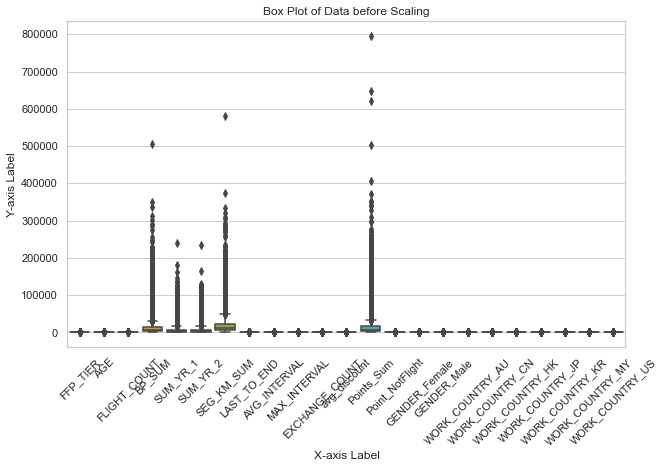

In [30]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Data before Scaling")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()


In [31]:
# initialze standard Scaler
ss = StandardScaler()

In [32]:
data = ss.fit_transform(data)

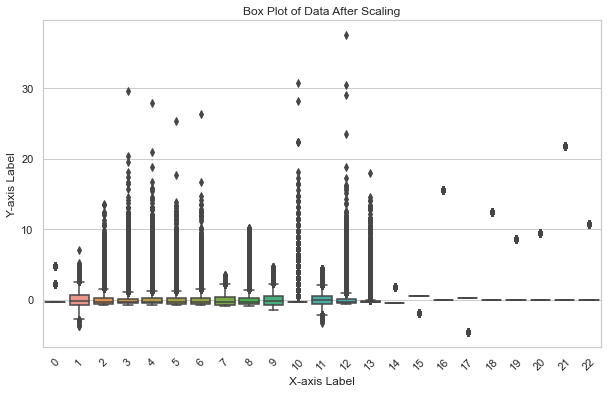

In [33]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Data After Scaling")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()

we have handled all the null values, encoded the categorical values, and removed unnecessary columns and applied scaling to data. Preprocessing is done. Finally, our data is ready for modeling 

##  Modelling the data 
module : from sklearn.cluster import KMeans

In [34]:
#initialize kmeans clustering
km = KMeans()

In [35]:
#fit and predict the data
y_km = km.fit_predict(data)
y_km

array([3, 3, 3, ..., 0, 1, 0])

In [36]:
y_km[180:190]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [37]:
set(y_km)

{0, 1, 2, 3, 4, 5, 6, 7}

In [43]:
errors =[]
for k in range(2,11):
    km = KMeans(n_clusters = k, random_state = 0)
    km.fit(data)
    errors.append(km.inertia_)

In [44]:
errors

[977577.9654893826,
 880414.4751250264,
 788182.2664807771,
 733937.3877719317,
 683383.170583115,
 631824.3901027658,
 582254.0611945199,
 532335.0612999672,
 491378.80829972913]

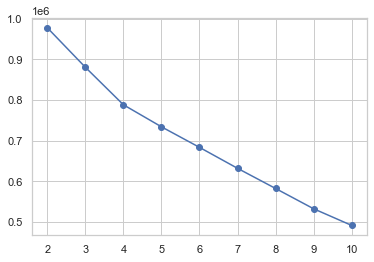

In [45]:
plt.plot(range(2,11),errors,marker = "o")

In [46]:
# Based on the elbow curve, select the optimal number of clusters (k) and re-fit the model
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

In [68]:
#converting data from numpy array to Pandas dataframe 
data1 = pd.DataFrame(data)

In [69]:
# Assign cluster labels to the data
data1['Cluster'] = kmeans.labels_

In [70]:
# Analyze the cluster assignments
cluster_counts = data1['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
2    34966
1    11087
0     4426
3      680
Name: Cluster, dtype: int64


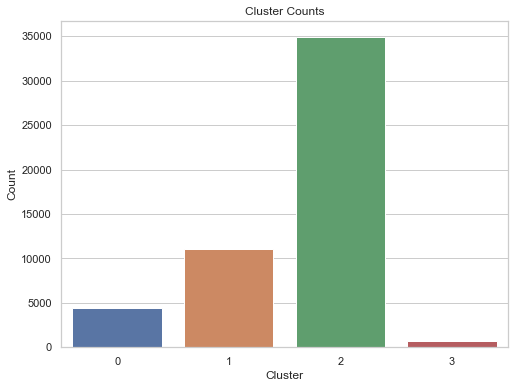

In [75]:
# Visualize the cluster counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=data1)
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [71]:
# Perform additional analysis on the clusters
cluster_means = data1.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means)


Cluster Means:
               0         1         2         3         4         5         6   \
Cluster                                                                         
0        2.063753  0.211160  2.344373  2.328462  2.015393  2.246064  2.298855   
1       -0.225477 -0.280878 -0.300464 -0.261305 -0.238401 -0.264453 -0.247142   
2       -0.186502  0.049132 -0.200128 -0.216069 -0.194264 -0.207927 -0.216795   
3       -0.166299  0.678768 -0.069538  0.215292  0.758316  0.384268  0.214417   

               7         8         9   ...        13        14        15  \
Cluster                                ...                                 
0       -0.747091 -0.704176 -0.689753  ...  0.946627 -0.255309  0.254888   
1        0.171200  0.105232  0.067792  ... -0.057712  1.834523 -1.834219   
2        0.032726  0.059014  0.069620  ... -0.096953 -0.545101  0.545055   
3        0.388560 -0.166942 -0.195746  ... -0.235100 -0.219652  0.219772   

               16        17        18   

In [73]:
# Explore the characteristics of each cluster
for cluster in range(k):
    print(f"\nCluster {cluster} Characteristics:")
    print(data1[data1['Cluster'] == cluster].describe())


Cluster 0 Characteristics:
                 0            1            2            3            4  \
count  4426.000000  4426.000000  4426.000000  4426.000000  4426.000000   
mean      2.063753     0.211160     2.344373     2.328462     2.015393   
std       1.808808     0.912457     1.540774     1.880740     1.953437   
min      -0.295364    -2.949842    -0.637650    -0.581676    -0.712038   
25%      -0.295364    -0.457642     1.335434     1.257650     0.860217   
50%       2.212190     0.165408     2.083845     1.795381     1.621351   
75%       2.212190     0.788458     3.036368     2.743093     2.636237   
max       4.719743     4.007550    13.582162    29.544457    27.901125   

                 5            6            7            8            9  ...  \
count  4426.000000  4426.000000  4426.000000  4426.000000  4426.000000  ...   
mean      2.246064     2.298855    -0.747091    -0.704176    -0.689753  ...   
std       1.773563     1.610201     0.262299     0.159338     0.4113

##### Silhouette score

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
silhouette_score(data,y_km)

0.2816405364030802

In [79]:
scores =[]
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state = 0)
    y_km = km.fit_predict(data)
    scores.append(silhouette_score(data,y_km))

In [80]:
scores

[0.42729587294083543,
 0.23996980961201472,
 0.2570682683914737,
 0.2522652679055559,
 0.25879259578157576,
 0.2683540731862542,
 0.27019419815886425,
 0.28111257162376524,
 0.2221819711654962]

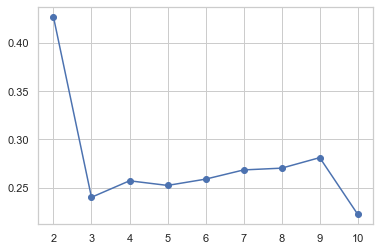

In [81]:
plt.plot(range(2,11),scores,marker = "o")

In [85]:
# Based on the silhouette scores, select the optimal number of clusters (k) and re-fit the model
k = scores.index(max(scores)) + 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=2, random_state=42)

In [87]:
# Assign cluster labels to the data
data1['Cluster'] = kmeans.labels_

In [89]:
# Analyze the cluster assignments
cluster_counts = data1['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
1    46037
0     5122
Name: Cluster, dtype: int64


In [91]:
# Perform additional analysis on the clusters
cluster_means = data1.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means)


Cluster Means:
               0         1         2         3         4         5         6   \
Cluster                                                                         
0        1.869004  0.224239  2.190218  2.170087  1.921881  2.102168  2.172756   
1       -0.207942 -0.024949 -0.243680 -0.241440 -0.213825 -0.233884 -0.241737   

               7         8         9   ...        13        14        15  \
Cluster                                ...                                 
0       -0.733570 -0.691140 -0.661087  ...  0.853068 -0.218030  0.217686   
1        0.081616  0.076895  0.073551  ... -0.094911  0.024258 -0.024219   

               16        17        18        19        20        21        22  
Cluster                                                                        
0       -0.006763 -0.000952 -0.029959  0.088806 -0.083029 -0.016219  0.024067  
1        0.000752  0.000106  0.003333 -0.009880  0.009238  0.001804 -0.002678  

[2 rows x 23 columns]


In [92]:
# Explore the characteristics of each cluster
for cluster in range(k):
    print(f"\nCluster {cluster} Characteristics:")
    print(data1[data1['Cluster'] == cluster].describe())


Cluster 0 Characteristics:
                 0            1            2            3            4  \
count  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000   
mean      1.869004     0.224239     2.190218     2.170087     1.921881   
std       1.833892     0.923374     1.506556     1.811446     1.901952   
min      -0.295364    -2.949842    -0.637650    -0.581676    -0.712038   
25%      -0.295364    -0.457642     1.199359     1.139339     0.782102   
50%       2.212190     0.165408     1.879733     1.645545     1.545626   
75%       2.212190     0.788458     2.832256     2.568894     2.543133   
max       4.719743     4.007550    13.582162    29.544457    27.901125   

                 5            6            7            8            9  ...  \
count  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  ...   
mean      2.102168     2.172756    -0.733570    -0.691140    -0.661087  ...   
std       1.737656     1.560183     0.283236     0.163638     0.4240